# Workflow 3 - cluster the trajectory

**Input:** EnGen object featurized with reduced dimensionality (generated by Workflow2)


**Output:** Representative trajectory ensemble  
<hr>
Steps:

1. Import the featurized trajectory from Workflow2
2. Choose clustering technique: KMeans, Gaussian Mixture Models
3. Choose appropriate parameters for clustering (number of clusters)
4. Additionally filter trajectories
5. Extract the ensemble

In [1]:
#required imports

from engens.core.EnGens import EnGen
from engens.core.ClustEn import *
import pickle as pk

### Step 1 - Load data from Workflow2

In [2]:
engen = None
with open("wf2_resulting_EnGen.pickle", "rb") as file:
    engen = pk.load(file)

In [3]:
traj = engen.traj
ref = engen.ref
print("Using the trajectory {} and reference pdb file {}".format(traj, ref))

topology = engen.mdtrajref
print("The topology is:")
print(topology)

frame_num = engen.data[engen.chosen_feat_index][1].shape[0]
print("Number of frames is {}".format(frame_num))

feat_dims = engen.data[engen.chosen_feat_index][1].shape[1]
print("The dimensionality of your featurization is {}".format(feat_dims))

feat = engen.featurizers[engen.chosen_feat_index]
print("You chose to featurize with")
print(feat.describe())

dimred_data = engen.dimred_data
print("After dimensionality reduction the dimension of your features is {}".format(dimred_data.shape[1]))


Using the trajectory ./ExampleTraj-engen-selected.xtc and reference pdb file ./ExampleTraj-engen-selected.pdb
The topology is:
<mdtraj.Topology with 1 chains, 37 residues, 299 atoms, 286 bonds>
Number of frames is 3000
The dimensionality of your featurization is 144
You chose to featurize with
['COS(PHI 0 ALA 57)', 'SIN(PHI 0 ALA 57)', 'COS(PSI 0 TYR 7)', 'SIN(PSI 0 TYR 7)', 'COS(PHI 0 ALA 61)', 'SIN(PHI 0 ALA 61)', 'COS(PSI 0 ALA 57)', 'SIN(PSI 0 ALA 57)', 'COS(PHI 0 ILE 64)', 'SIN(PHI 0 ILE 64)', 'COS(PSI 0 ALA 61)', 'SIN(PSI 0 ALA 61)', 'COS(PHI 0 SER 65)', 'SIN(PHI 0 SER 65)', 'COS(PSI 0 ILE 64)', 'SIN(PSI 0 ILE 64)', 'COS(PHI 0 ALA 79)', 'SIN(PHI 0 ALA 79)', 'COS(PSI 0 SER 65)', 'SIN(PSI 0 SER 65)', 'COS(PHI 0 VAL 82)', 'SIN(PHI 0 VAL 82)', 'COS(PSI 0 ALA 79)', 'SIN(PSI 0 ALA 79)', 'COS(PHI 0 LEU 83)', 'SIN(PHI 0 LEU 83)', 'COS(PSI 0 VAL 82)', 'SIN(PSI 0 VAL 82)', 'COS(PHI 0 THR 86)', 'SIN(PHI 0 THR 86)', 'COS(PSI 0 LEU 83)', 'SIN(PSI 0 LEU 83)', 'COS(PHI 0 GLN 87)', 'SIN(PHI 0 GL

### Step 2 - choose the clustering method and cluster

In [4]:
# Example 1 - choose Kmeans

clustering = "KM" # options: KM | GMM
cluster_method1 = clusterings[clustering](engen)

In [5]:
# Example 2 - choose GMMs

clustering = "GMM" # options: KM | GMM
cluster_method2 = clusterings[clustering](engen)

### Step 3 - run the clustering with different parameters

Clustering with params={'n_clusters': 2}
Clustering with params={'n_clusters': 3}
Clustering with params={'n_clusters': 4}
Clustering with params={'n_clusters': 5}
Clustering with params={'n_clusters': 6}
Clustering with params={'n_clusters': 7}
Clustering with params={'n_clusters': 8}
Clustering with params={'n_clusters': 9}


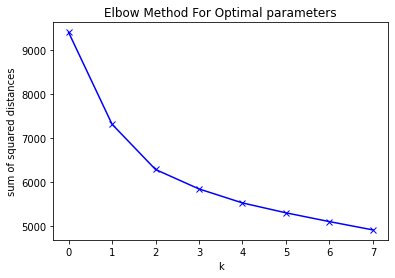

Optimal index=7
Optimal params={'n_clusters': 9}


7

In [6]:
# Example 1 - iterate through Kmeans number of clusters

params = [{"n_clusters":i} for i in range(2, 10)]
cluster_method1.cluster_multiple_params(params)

# analyze these parameters with the elbow method
cluster_method1.analyze_elbow_method()

Best parameter index from silhouette analysis are 2
Best parameters from silhouette analysis are {'n_clusters': 4}


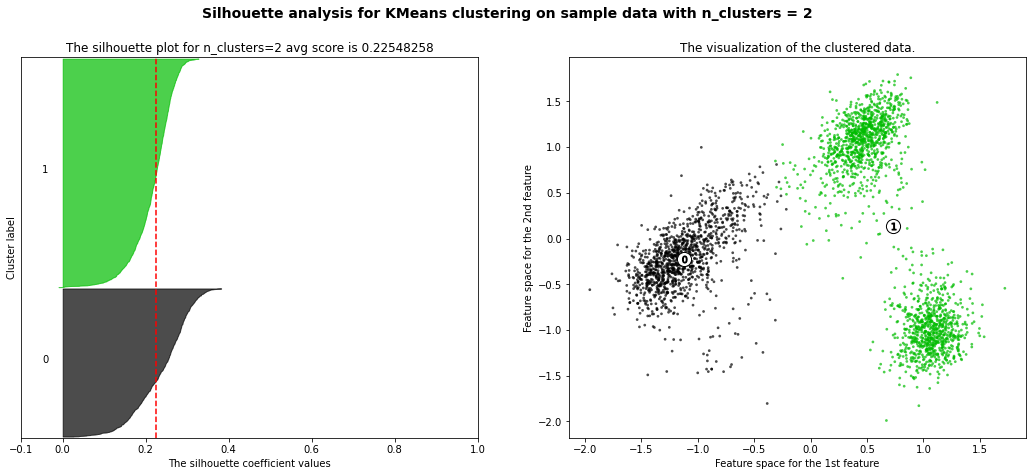

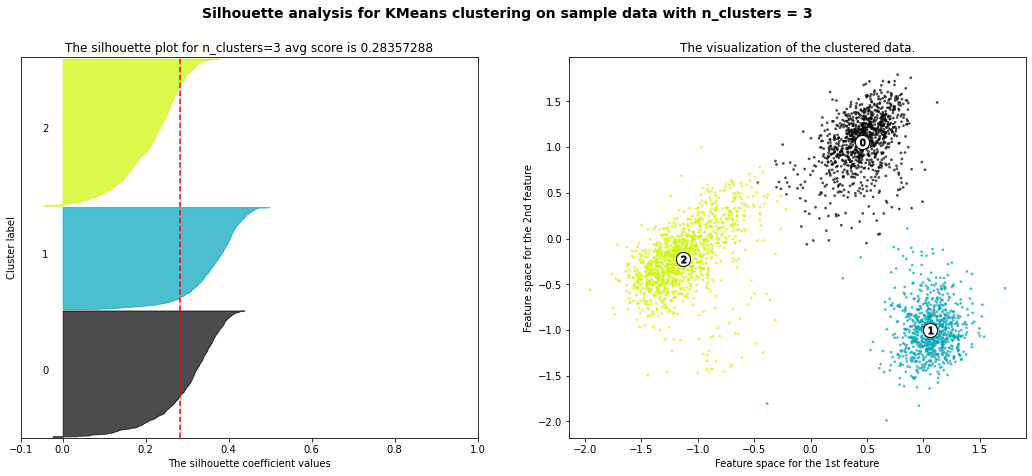

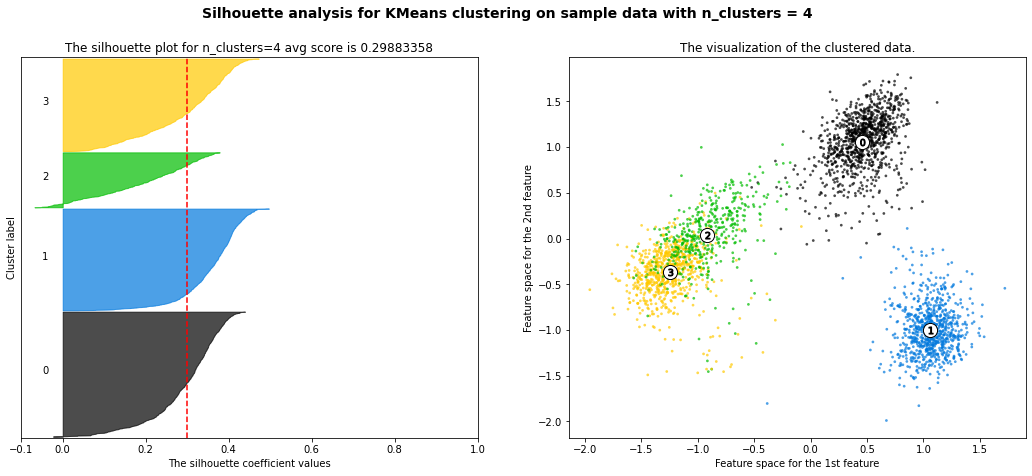

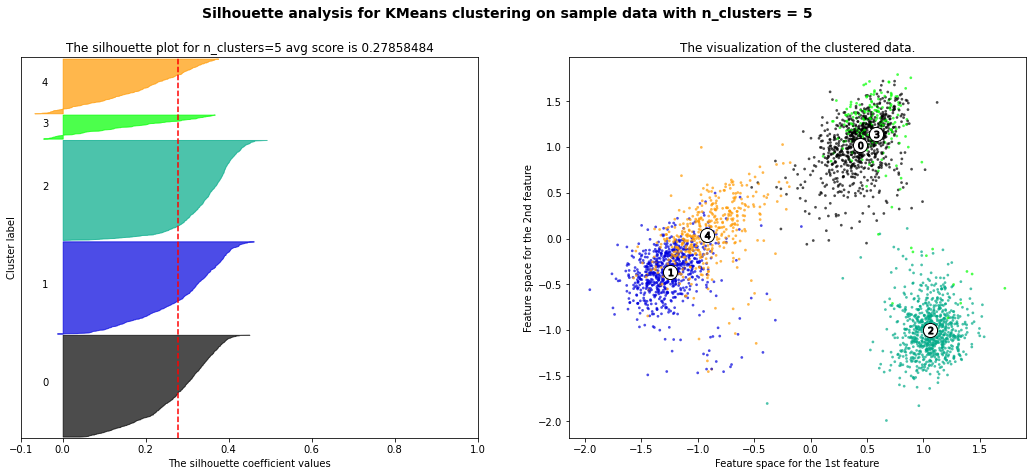

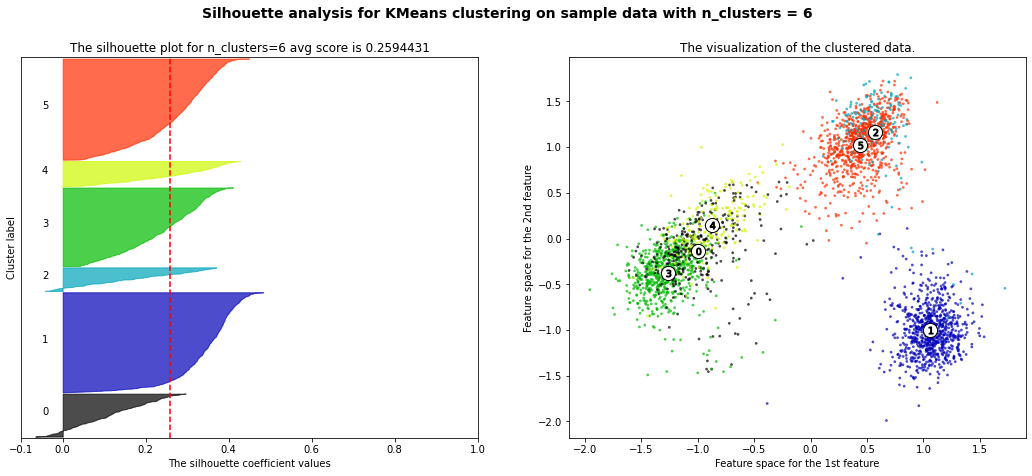

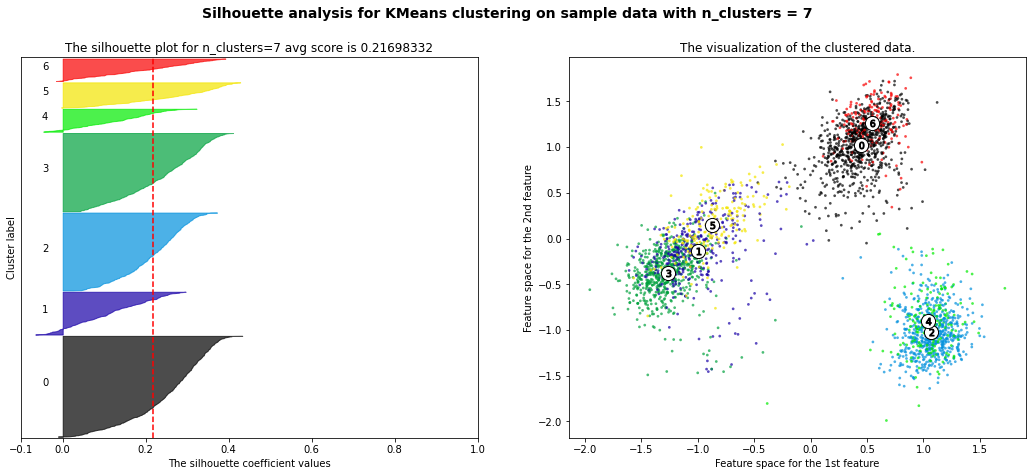

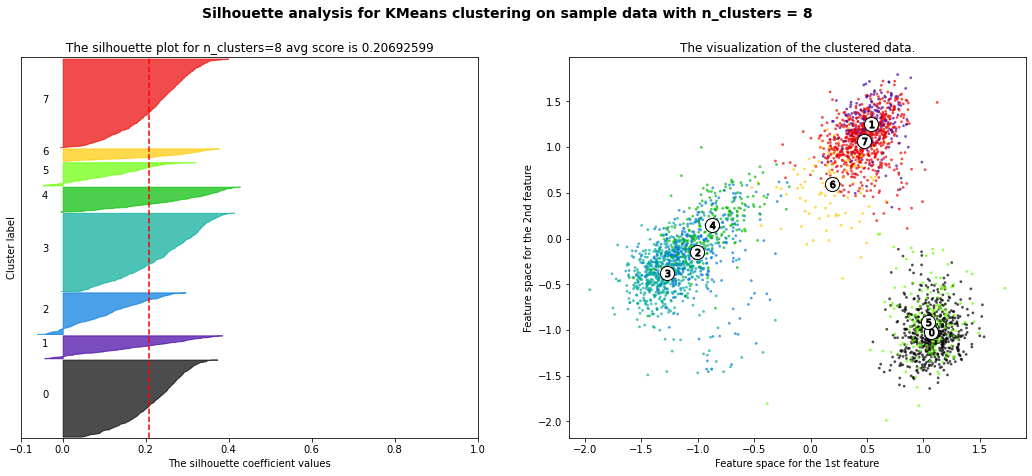

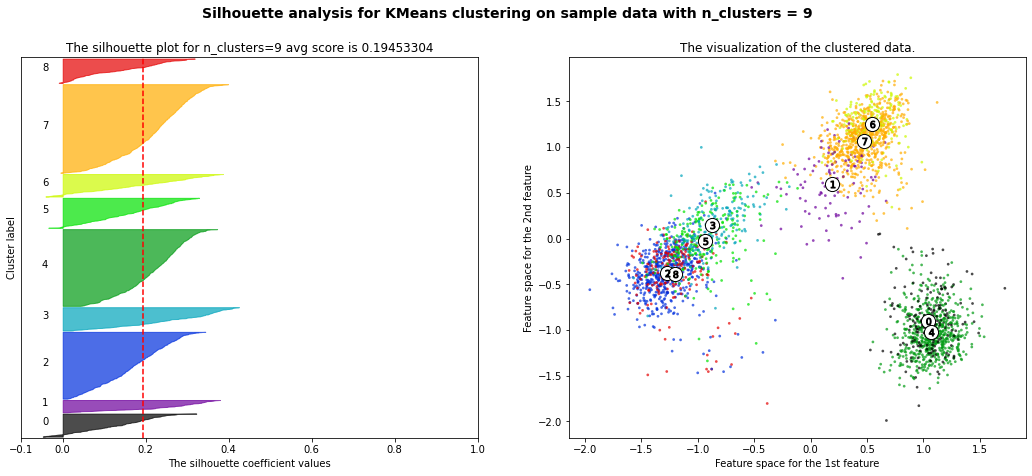

In [7]:
# analyze these parameters with the silhouette method
cluster_method1.analyze_silhouette()

In [8]:
# pick the parameter index
param_index = 2

cluster_method1.choose_param(param_index)

Clustering with params={'n_components': 2}
Clustering with params={'n_components': 3}
Clustering with params={'n_components': 4}
Clustering with params={'n_components': 5}
Clustering with params={'n_components': 6}
Clustering with params={'n_components': 7}
Clustering with params={'n_components': 8}
Clustering with params={'n_components': 9}


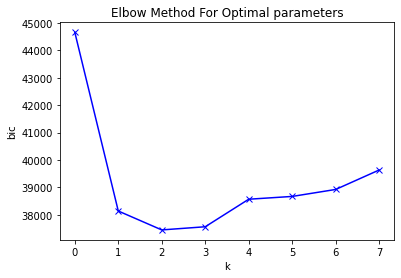

Optimal index=2
Optimal params={'n_components': 4}


2

In [9]:
# Example 2- iterate through GMM number of components

params = [{"n_components":i} for i in range(2, 10)]
cluster_method2.cluster_multiple_params(params)

# analyze these parameters with the elbow method
cluster_method2.analyze_elbow_method()

Best parameter index from silhouette analysis are 2
Best parameters from silhouette analysis are {'n_components': 4}


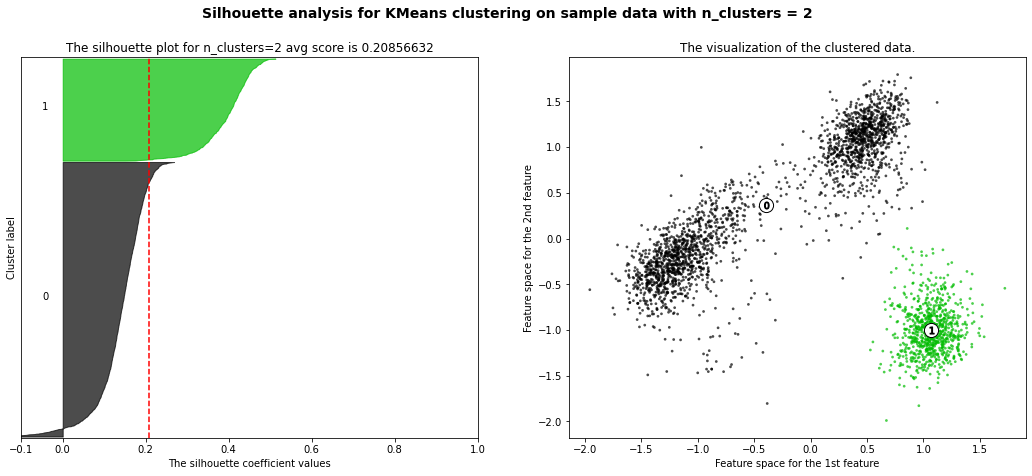

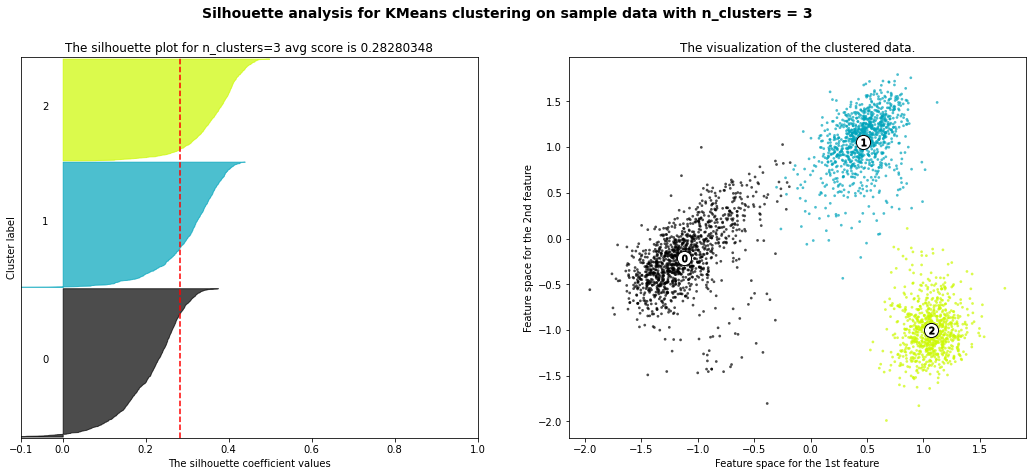

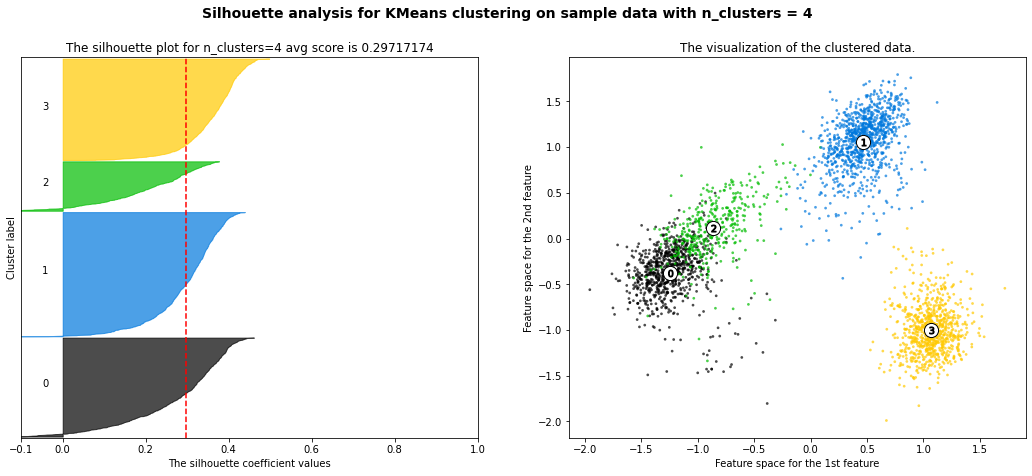

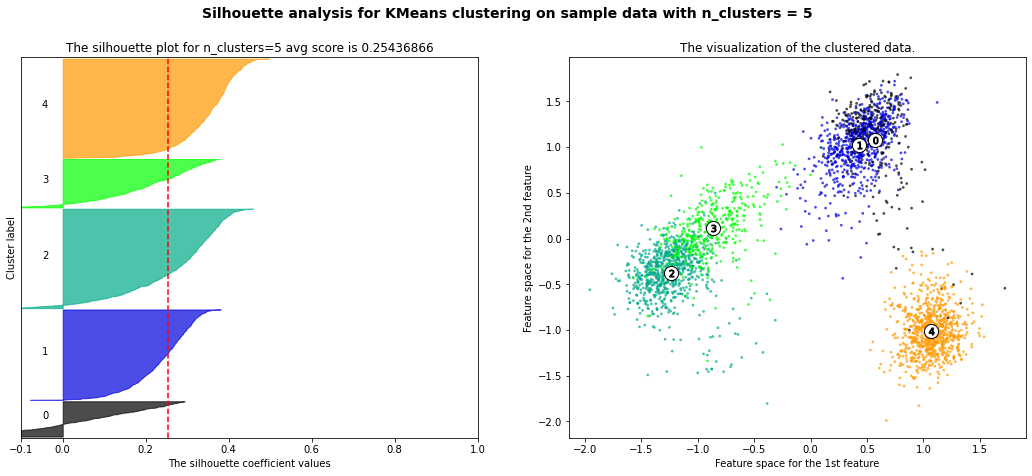

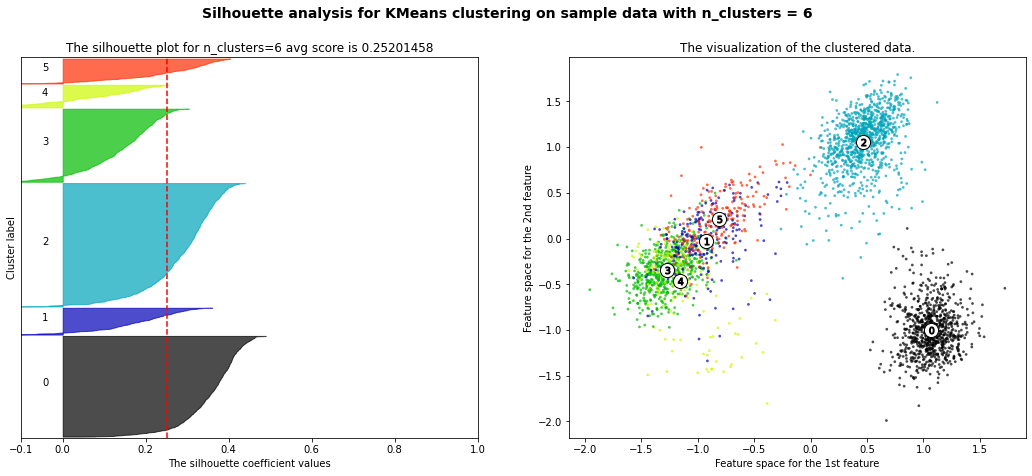

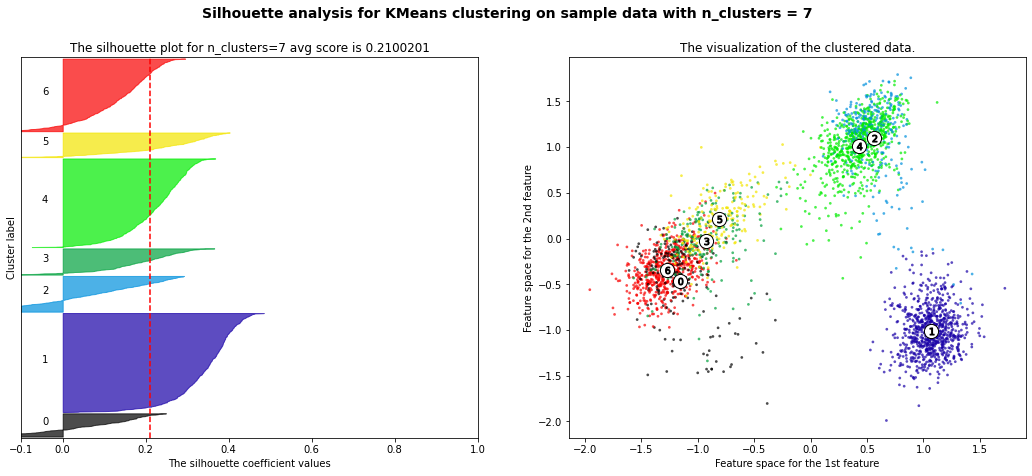

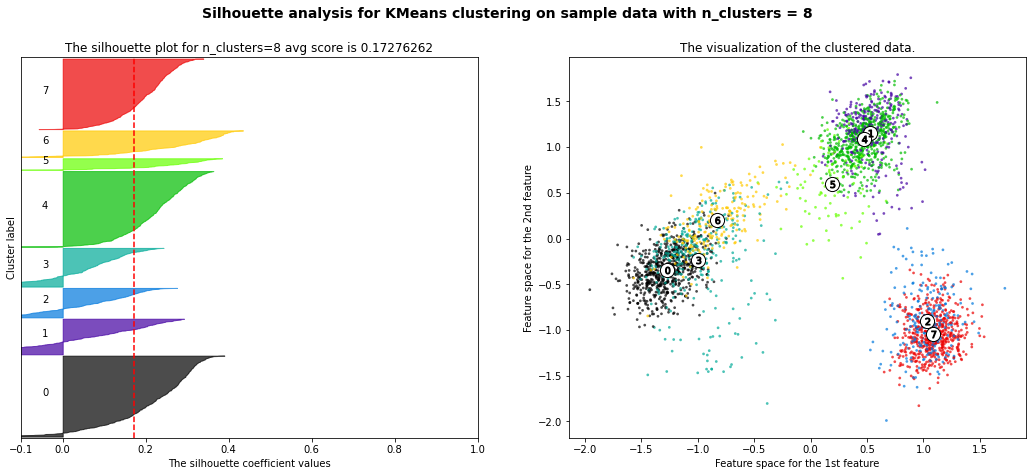

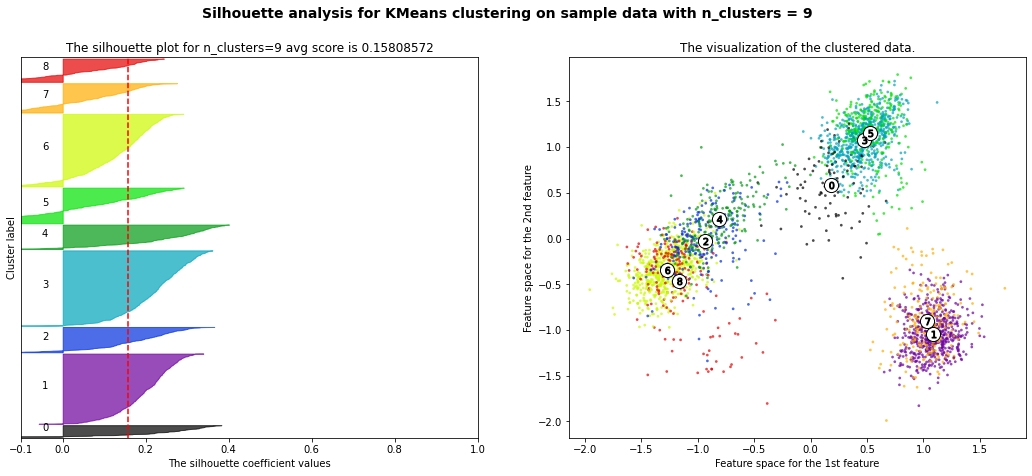

In [10]:
# analyze these parameters with the silhouette method
cluster_method2.analyze_silhouette()

In [11]:
# pick the parameter index
param_index = 0

cluster_method2.choose_param(param_index)

### Step 4 - optionally pick a subset of clusters with the heighest weight

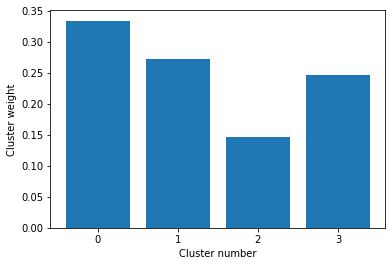

In [12]:
cluster_method1.plot_cluster_weight()

Chosen cluster ids: [0, 1, 3]


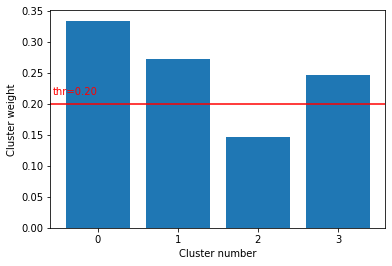

In [13]:
cluster_method1.choose_clusters(thr=0.2)

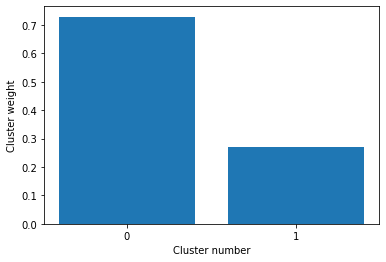

In [14]:
cluster_method2.plot_cluster_weight()

Chosen cluster ids: [0, 1]


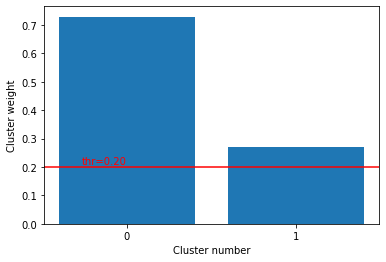

In [15]:
cluster_method2.choose_clusters(thr=0.2)

### Step 5 - extract conformations for the ensemble

Chosen centers: [array([ 4.5983186e-01,  1.0605127e+00, -1.7280008e-01, ...,
        4.7793047e-04,  5.1155733e-04, -5.4553240e-03], dtype=float32), array([ 1.0630382e+00, -9.9750596e-01,  4.1790206e-02, ...,
        1.4075885e-03, -9.0634869e-04, -1.3366652e-03], dtype=float32), array([-1.2472039e+00, -3.7045631e-01, -5.7064092e-01, ...,
        2.0324979e-03,  3.8469292e-03, -4.1602549e-04], dtype=float32)]
Chosen frames: [2424 1495  288]
Closest conformation inside cluster 0 frame 2424 of the striped trajectory
Extracting and saving
Closest conformation inside cluster 1 frame 1495 of the striped trajectory
Extracting and saving
Closest conformation inside cluster 3 frame 288 of the striped trajectory
Extracting and saving


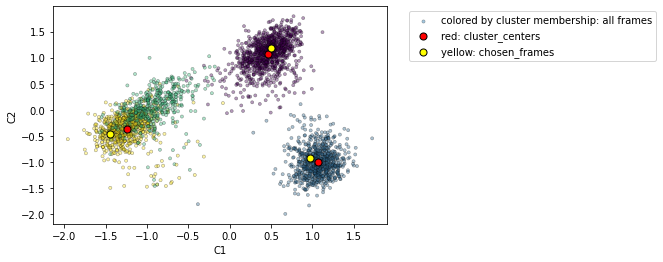

In [16]:
ensemble_location = "./res_ensemble_kmeans"
cluster_method1.choose_conformations()
cluster_method1.extract_conformations(ensemble_location)


Chosen centers: [array([-3.97213248e-01,  3.67660073e-01, -1.78734044e-02, ...,
        1.13841368e-04, -1.61106532e-04,  1.66177433e-04]), array([ 1.06621788e+00, -9.97489480e-01,  4.26835145e-02, ...,
        8.70536204e-04,  5.31722453e-04, -4.11125784e-04])]
Chosen frames: [ 524 1495]
Closest conformation inside cluster 0 frame 524 of the striped trajectory
Extracting and saving
Closest conformation inside cluster 1 frame 1495 of the striped trajectory
Extracting and saving


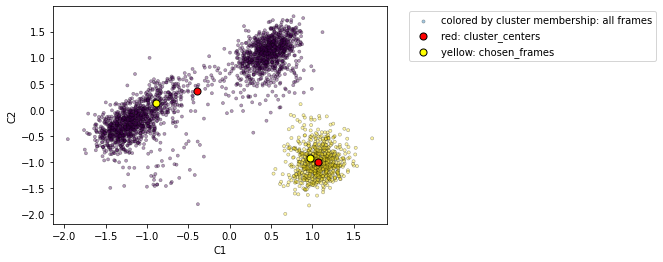

In [17]:
ensemble_location = "./res_ensemble_gmm"
cluster_method2.choose_conformations()
cluster_method2.extract_conformations(ensemble_location)